In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
us = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = us[us['name'] == "United States of America"]

In [11]:
rivers_file = str(Path(".").resolve().parent / "data/rivers_ge30m.shp")
print(rivers_file)

rivers_df = gpd.read_file(rivers_file)

/Volumes/backup_plus/thesis/data/rivers_ge30m.shp


In [24]:
rivers_df.set_crs(epsg=4326, inplace=True)
rivers_df_clipped = gpd.clip(rivers_df, us.envelope)

In [26]:
rivers_df_clipped.to_pickle("rivers_ge30m_clipped_to_us_extent.p")

/Users/austinraney/miniconda3/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


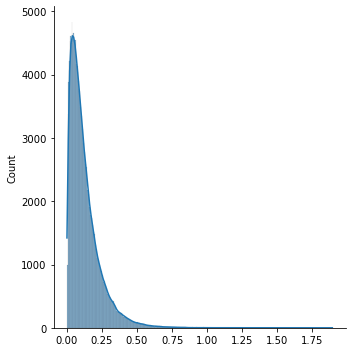

In [36]:
sns.displot(rivers_df_clipped.geometry.length, kde=True)

In [47]:
df = pd.read_pickle("../data/SWOT_ADCP_Dataset_removed_mean_depth_va_no_data.p")

In [49]:
print(rivers_df_clipped.head())
print(df.head())

           COMID  order        area       Sin       Slp        Elev  \
516454  71000001    2.0  391.888602  1.688335  0.000427  270.800020   
516455  71000002    2.0  701.729110  1.538670  0.000058  271.163919   
516456  71000003    2.0  480.739143  1.316838  0.000770  279.471222   
516457  71000004    2.0  388.921753  1.347168  0.000911  287.228577   
516458  71000005    2.0  328.548936  1.336828  0.000670  291.024205   

                   K     P        AI  LAI  ...        SLT  Urb       WTD  \
516454  8.000000e-15  0.01  0.785773  0.0  ...  29.939394  0.0  5.934278   
516455  8.000000e-15  0.01  0.782485  0.0  ...  31.304762  0.0  7.041763   
516456  3.020000e-11  0.00  0.752624  0.0  ...  28.715909  0.0  7.115862   
516457  3.020000e-11  0.00  0.741993  0.0  ...  29.130435  0.0  7.236753   
516458  3.020000e-11  0.00  0.740822  0.0  ...  30.285714  0.0  7.499449   

              HW  DOR     QMEAN         Q2   width_m  width_DHG  \
516454  0.000045  0.0  2.239478  43.362257  79.85